In [206]:
"""Reads in and plots data generated from L. Roberts' C++ code for the isothermal case"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def readData(path):
    """Reads in csv data generated by L. Roberts' code for isothermal winds
    Takes file path (string) and returns an array of data sets, where each set is a 2D array of x, u, s values for a given x0"""
    dataFile=open(path,"r")
    dataObj=pd.read_csv(dataFile,delim_whitespace=True)
    dataFile.close()
    dataFull=dataObj.to_numpy()

    dataPartitioned=[]
    last=0
    #print(dataFull)
    for i in range(len(dataFull)):
        if dataFull[i][0]==0:
            dataPartitioned.append(np.array(dataFull[last:i-1],dtype=float))
            #print(dataFull[last:i-1])
            last=i
    dataPartitioned.append(np.array(dataFull[last:-1],dtype=float))
    #print(dataPartitioned)
    return dataPartitioned

def plotData(dataPartitioned,xmax=50,ymax=5,allplots=False):
    '''Takes an array of data sets and plots u vs x, returns 0 and outputs the plot'''
    
    if allplots:
        plt.figure(1)
        plt.xlim(0, xmax)
        plt.ylim(0, ymax)
        plt.title("r/r0 as a function of t")
        for i in range(len(dataPartitioned)):
            #plt.figure(i)    #uncomment to separate graphs
            plt.scatter(dataPartitioned[i][:,0],np.exp(dataPartitioned[i][:,1]),s=1)
        plt.figure(2)
        plt.xlim(0, xmax)
        plt.ylim(0, ymax)
        plt.title("v/cs as a function of t")
        for i in range(len(dataPartitioned)):
            #plt.figure(i)    #uncomment to separate graphs
            plt.scatter(dataPartitioned[i][:,0],np.exp(dataPartitioned[i][:,2]-dataPartitioned[i][:,3]/2),s=1)
        plt.figure(3)
        plt.xlim(0, xmax)
        plt.ylim(0, ymax)
        plt.title("T/T0 as a function of t")
        for i in range(len(dataPartitioned)):
            #plt.figure(i)    #uncomment to separate graphs
            plt.scatter(dataPartitioned[i][:,0],np.exp(dataPartitioned[i][:,3]),s=1)
        plt.figure(4)
        plt.xlim(1, xmax)
        plt.ylim(0, ymax)
        plt.title("T/T0 as a function of r/r0")
        for i in range(len(dataPartitioned)):
            #plt.figure(i)    #uncomment to separate graphs
            plt.scatter(np.exp(dataPartitioned[i][:,1]),np.exp(dataPartitioned[i][:,3]),s=1)
        plt.figure(5)
        plt.xlim(1, xmax)
        plt.ylim(0, ymax)
        plt.title("T/T0 as a function of v/cs")
        for i in range(len(dataPartitioned)):
            #plt.figure(i)    #uncomment to separate graphs
            plt.scatter(np.exp(dataPartitioned[i][:,2]-dataPartitioned[i][:,3]/2),np.exp(dataPartitioned[i][:,3]),s=1)
    
    plt.figure(6)
    plt.xlim(1, xmax)
    plt.ylim(0, ymax)
    plt.title("v/cs as a function of r/r0")
    for i in range(len(dataPartitioned)):
        #plt.figure(i+6)    #uncomment to separate graphs
        plt.scatter(np.exp(dataPartitioned[i][:,1]),np.exp(dataPartitioned[i][:,2]-dataPartitioned[i][:,3]/2),s=1)
    
    plt.figure(100)
    plt.xlim(1, xmax)
    plt.ylim(0, ymax)
    plt.scatter(np.exp(dataPartitioned[-1][:,1]),np.exp(dataPartitioned[-1][:,2]-dataPartitioned[i][:,3]/2),s=1)
    return 0

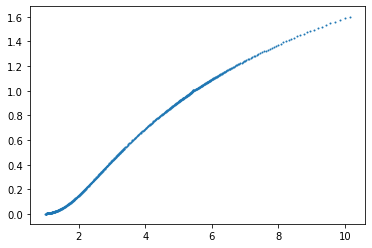

In [159]:
"""Reads in data for a single curve from my C++ code and plots it"""

def readMyData(path):
    dataFile=open(path,"r")
    dataObj=pd.read_csv(dataFile,delim_whitespace=True)
    dataFile.close()
    dataFull=dataObj.to_numpy()
    return dataFull

d2=readMyData("../C++/NDWSolver/NDWSolver/output.txt")
plt.scatter(np.exp(d2[:,1]),np.exp(d2[:,2]-d2[:,3]/2),s=1);

[array([[ 1.00000e-02,  1.00000e-02, -2.29463e+01,  0.00000e+00],
       [ 2.00000e-02,  2.00000e-02, -2.28677e+01,  0.00000e+00],
       [ 3.00000e-02,  3.00000e-02, -2.27901e+01,  0.00000e+00],
       ...,
       [ 3.89000e+00,  3.89000e+00, -1.54739e+01,  0.00000e+00],
       [ 3.90000e+00,  3.90000e+00, -1.54559e+01,  0.00000e+00],
       [ 3.91000e+00,  3.91000e+00, -1.54379e+01,  0.00000e+00]]), array([[ 0.00000e+00,  0.00000e+00, -6.90776e+00,  0.00000e+00],
       [ 5.00000e-03,  4.99999e-03, -6.86786e+00,  0.00000e+00],
       [ 1.00000e-02,  9.99999e-03, -6.82821e+00,  0.00000e+00],
       ...,
       [ 4.03000e+00,  3.86518e+00,  7.80562e-01,  0.00000e+00],
       [ 4.03500e+00,  3.88418e+00,  7.89522e-01,  0.00000e+00],
       [ 4.04000e+00,  3.90361e+00,  7.98502e-01,  0.00000e+00]]), array([[ 0.00000e+00,  0.00000e+00, -6.21461e+00,  0.00000e+00],
       [ 5.00000e-03,  4.99998e-03, -6.17471e+00,  0.00000e+00],
       [ 1.00000e-02,  9.99996e-03, -6.13506e+00,  0.00000e+0

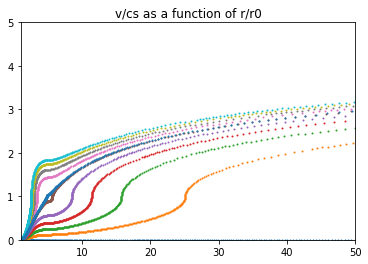

In [183]:
d=readData("../C++/NDWSolver/NDWSolver/isothermal.txt");
plotData(d);

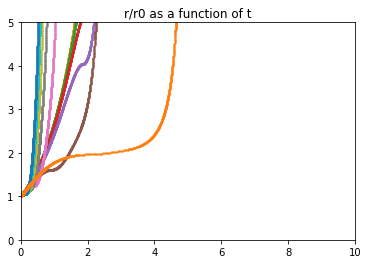

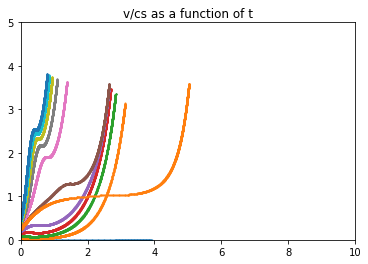

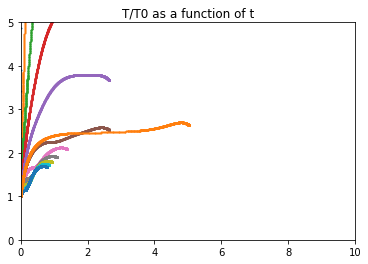

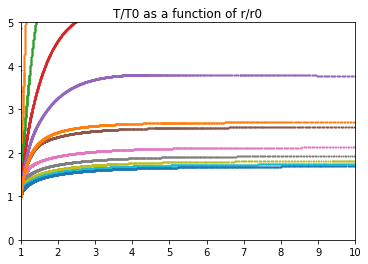

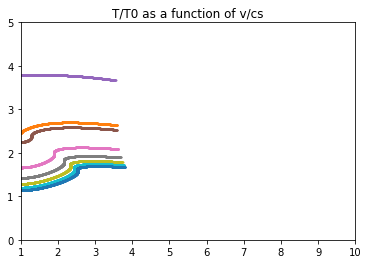

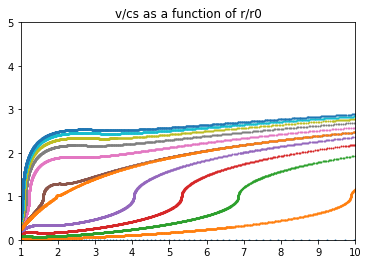

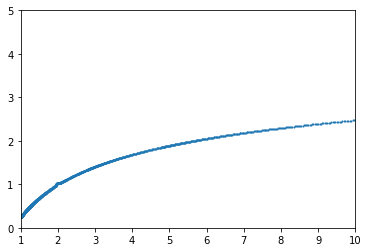

In [219]:
d=readData("../C++/NDWSolver/NDWSolver/gammaheating.txt");
plotData(d,10,5,allplots=True);

[array([[ 7.81250e-07,  1.56816e-09,  1.00625e-03, -6.56645e-08],
       [ 1.56250e-06,  3.14616e-09,  1.01250e-03, -1.31349e-07],
       [ 2.34375e-06,  4.73400e-09,  1.01875e-03, -1.97053e-07],
       ...,
       [ 2.23901e-01,  3.89886e+00,  1.42382e+00, -1.27637e+00],
       [ 2.24001e-01,  3.90494e+00,  1.42395e+00, -1.27671e+00],
       [ 2.24101e-01,  3.91103e+00,  1.42408e+00, -1.27704e+00]])]


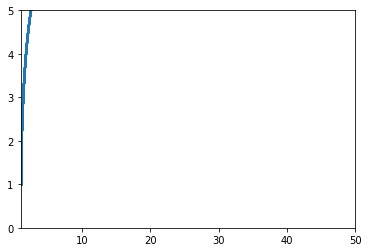

In [204]:
d=readData("../C++/NDWSolver/NDWSolver/gammaheating2.txt");


#d[0][-1]=[0,-100,-100,-100];
#print(d[-1]);
print(d)
d=d[0][:-1];
d=np.array(d,dtype=float)
#print(d);
#print(type(d))
plt.figure(4)
plt.xlim(1, 50)
plt.ylim(0, 5)
plt.scatter(np.exp(d[:,1]),np.exp(d[:,2]-d[:,3]/2),s=1);